In [1]:
import os
import json

# 🔁 Replace with your actual credentials
kaggle_token = {
    "username": "sakthivelllllllll",
    "key": "38a56437a7c3834ea1bd7a62e92b06bf"
}

# Create the ~/.kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)

# Save the token file there
with open("/root/.kaggle/kaggle.json", "w") as file:
    json.dump(kaggle_token, file)

# Change file permissions
!chmod 600 /root/.kaggle/kaggle.json

print("✅ Kaggle authentication setup completed.")


✅ Kaggle authentication setup completed.


In [2]:
# 📦 Download dataset using Kaggle CLI
!kaggle datasets download -d alxmamaev/flowers-recognition


Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
 81% 183M/225M [00:00<00:00, 276MB/s]
100% 225M/225M [00:00<00:00, 303MB/s]


In [3]:
import zipfile

# Extract to a folder named "flowers"
with zipfile.ZipFile("flowers-recognition.zip", 'r') as zip_ref:
    zip_ref.extractall("flowers")

print("✅ Dataset unzipped!")


✅ Dataset unzipped!


In [4]:
# List the flower categories
flower_classes = os.listdir("flowers/flowers")
print("🌸 Flower classes:", flower_classes)

# Example: List images in 'tulip' folder
print("📸 Sample Tulip Images:", os.listdir("flowers/flowers/tulip")[:5])


🌸 Flower classes: ['sunflower', 'daisy', 'dandelion', 'rose', 'tulip']
📸 Sample Tulip Images: ['19915714271_3d8d6a23a5_n.jpg', '2254152047_d3bf8903cd_n.jpg', '4312181724_16dab26afb_n.jpg', '5717951019_739d8307d4_n.jpg', '20692436712_75b2deaedf_n.jpg']


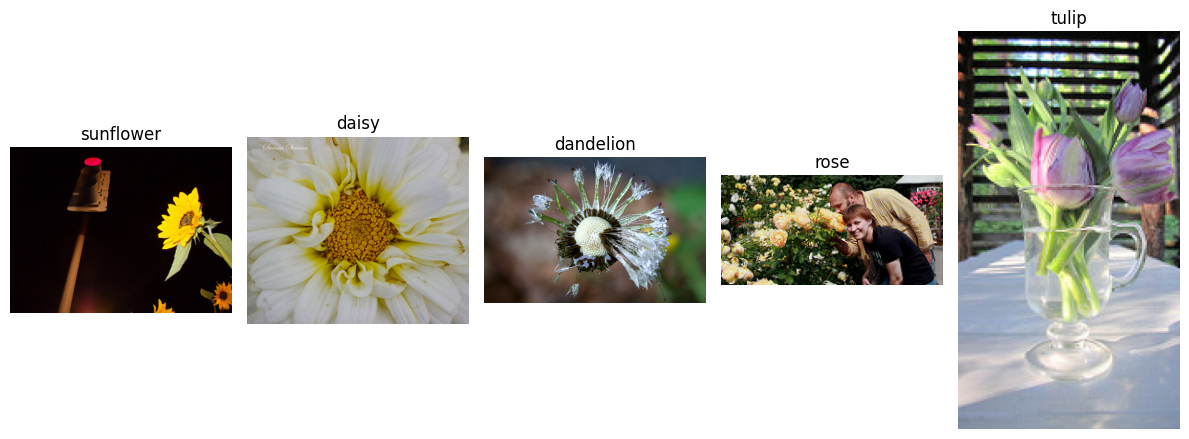

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(12, 8))

for i, flower in enumerate(flower_classes[:5]):
    folder = os.path.join("flowers/flowers", flower)
    img_name = os.listdir(folder)[0]
    img_path = os.path.join(folder, img_name)
    img = Image.open(img_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(flower)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [7]:
import shutil

base_dir = "flowers/flowers"
classes = os.listdir(base_dir)

# Create directories
for split in ['train', 'val', 'test']:
    for cls in classes:
        os.makedirs(f'dataset/{split}/{cls}', exist_ok=True)

# Split and copy
for cls in classes:
    images = os.listdir(os.path.join(base_dir, cls))
    train, temp = train_test_split(images, test_size=0.3, random_state=42)
    val, test = train_test_split(temp, test_size=0.5, random_state=42)

    for img in train:
        shutil.copy(os.path.join(base_dir, cls, img), f'dataset/train/{cls}/{img}')
    for img in val:
        shutil.copy(os.path.join(base_dir, cls, img), f'dataset/val/{cls}/{img}')
    for img in test:
        shutil.copy(os.path.join(base_dir, cls, img), f'dataset/test/{cls}/{img}')

print("✅ Dataset split done!")


✅ Dataset split done!


In [8]:
img_size = (150, 150)
batch_size = 32

train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory("dataset/train", target_size=img_size, class_mode='categorical', batch_size=batch_size)
val_data = val_gen.flow_from_directory("dataset/val", target_size=img_size, class_mode='categorical', batch_size=batch_size)
test_data = test_gen.flow_from_directory("dataset/test", target_size=img_size, class_mode='categorical', batch_size=1, shuffle=False)


Found 3019 images belonging to 5 classes.
Found 649 images belonging to 5 classes.
Found 649 images belonging to 5 classes.


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,997 (40.58 MB)

 Trainable params: 10,636,997 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(train_data, validation_data=val_data, epochs=1)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4268 - loss: 1.3406

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


95/95 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.4274 - loss: 1.3394 - val_accuracy: 0.5547 - val_loss: 1.1125


In [12]:
test_loss, test_acc = model.evaluate(test_data)
print(f"✅ Test Accuracy: {test_acc:.2f}")


  3/649 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.0000e+00 - loss: 1.7550

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


649/649 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.4436 - loss: 1.2735
✅ Test Accuracy: 0.57


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
🔍 Predicted Flower: dandelion


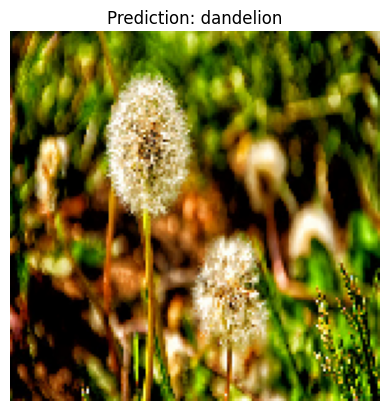

In [13]:
from tensorflow.keras.preprocessing import image

# Load and preprocess image
img_path = '/content/flowers/flowers/dandelion/10778387133_9141024b10.jpg'  # uploaded image
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_class = list(train_data.class_indices.keys())[np.argmax(prediction)]
print("🔍 Predicted Flower:", predicted_class)

plt.imshow(img)
plt.title(f"Prediction: {predicted_class}")
plt.axis('off')
plt.show()
